In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor,Pool
from sklearn.metrics import r2_score

In [44]:
train = pd.read_csv(r"train_F3fUq2S.csv")
test = pd.read_csv(r"test_Bk2wfZ3.csv")
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [45]:
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

<AxesSubplot:>

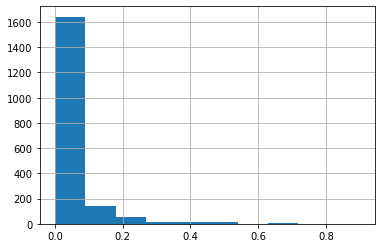

In [46]:
train['click_rate'].hist()

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [48]:
def encode_and_bind(original_dataframe,features_to_encode):
    dummies = pd.get_dummies(original_dataframe[[features_to_encode]])
    res = pd.concat([original_dataframe,dummies],axis=1)
    return res

In [72]:
# train['times_of_day'] = train['times_of_day'].replace({'Morning':1,
#                                                       'Noon':2,
#                                                       'Evening':3})
# test['times_of_day'] = test['times_of_day'].replace({'Morning':1,
#                                                       'Noon':2,
#                                                       'Evening':3})
train = encode_and_bind(train,'times_of_day')
test = encode_and_bind(test,'times_of_day')
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,times_of_day_Evening,times_of_day_Morning,times_of_day_Noon
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,14,0.103079,0,0,1
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,10,0.700000,0,1,0
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,0,0,0,16,0.002769,0,0,1
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,10,0.010868,1,0,0
4,5,3,80,10011,27,5,1,Noon,6,26,...,1,0,0,0,0,14,0.142826,0,0,1


In [50]:
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [51]:
train['is_urgency'].value_counts()

0    1676
1     212
Name: is_urgency, dtype: int64

In [52]:
train['is_price'][train['is_price']>0] = 1
test['is_price'][test['is_price']>0] = 1

train['is_image'][train['is_image']>0] = 1
test['is_image'][test['is_image']>0] = 1

train['is_quote'][train['is_quote']>0] = 1
test['is_quote'][test['is_quote']>0] = 1

train['is_emoticons'][train['is_emoticons']>0] = 1
test['is_emoticons'][test['is_emoticons']>0] = 1

/var/folders/9x/j42r0vlj4lv95k0r2zfxlpfr0000gn/T/ipykernel_714/2791053866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['is_price'][train['is_price']>0] = 1
/var/folders/9x/j42r0vlj4lv95k0r2zfxlpfr0000gn/T/ipykernel_714/2791053866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['is_price'][test['is_price']>0] = 1
/var/folders/9x/j42r0vlj4lv95k0r2zfxlpfr0000gn/T/ipykernel_714/2791053866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

# EDA

<AxesSubplot:xlabel='times_of_day', ylabel='click_rate'>

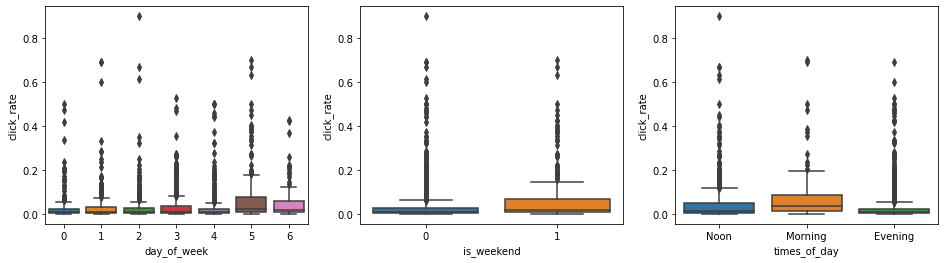

In [53]:
#is_timer drop
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
sns.boxplot(data=train, y='click_rate',x='day_of_week', ax=ax[0])
sns.boxplot(data=train, y='click_rate',x='is_weekend', ax=ax[1])
sns.boxplot(data=train, y='click_rate',x='times_of_day', ax=ax[2])

In [54]:
train[['day_of_week','is_weekend','times_of_day',
       'is_timer','click_rate']].corr()

,day_of_week,is_weekend,is_timer,click_rate
day_of_week,1.000000,0.720599,NaN,0.086372
is_weekend,0.720599,1.000000,NaN,0.114138
is_timer,NaN,NaN,NaN,NaN
click_rate,0.086372,0.114138,NaN,1.000000


<AxesSubplot:xlabel='click_rate', ylabel='mean_CTA_len'>

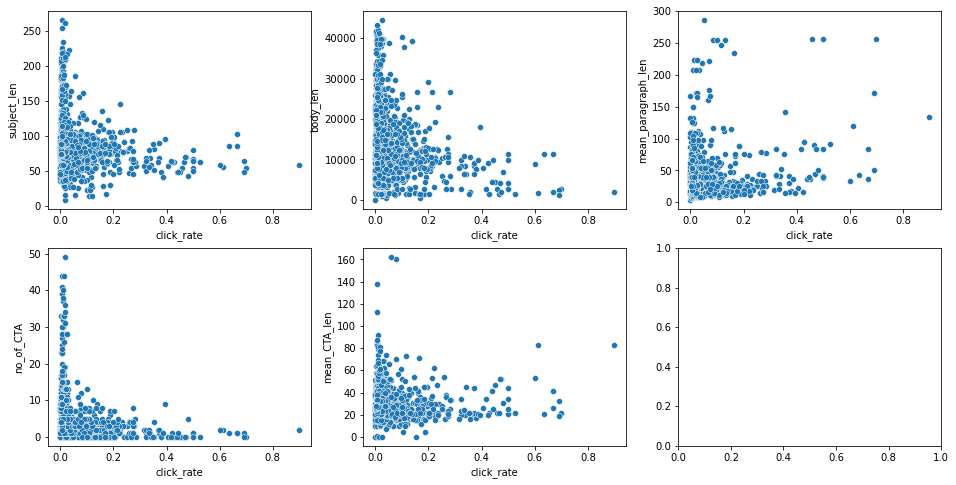

In [55]:
#'subject_len', 'body_len','mean_paragraph_len','no_of_CTA', 'mean_CTA_len'
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
sns.scatterplot(data=train, x='click_rate',y='subject_len', ax=ax[0][0])
sns.scatterplot(data=train, x='click_rate',y='body_len', ax=ax[0][1])
sns.scatterplot(data=train, x='click_rate',y='mean_paragraph_len', ax=ax[0][2])
sns.scatterplot(data=train, x='click_rate',y='no_of_CTA', ax=ax[1][0])
sns.scatterplot(data=train, x='click_rate',y='mean_CTA_len', ax=ax[1][1])

In [56]:
train[['subject_len', 'body_len','mean_paragraph_len','no_of_CTA','mean_CTA_len','click_rate']].corr()
#drop subject_len,mean_CTA_len

,subject_len,body_len,mean_paragraph_len,no_of_CTA,mean_CTA_len,click_rate
subject_len,1.000000,0.427326,-0.224770,0.400213,0.144261,-0.180143
body_len,0.427326,1.000000,-0.496146,0.559353,0.083468,-0.247866
mean_paragraph_len,-0.224770,-0.496146,1.000000,-0.170012,0.064632,0.178042
no_of_CTA,0.400213,0.559353,-0.170012,1.000000,0.170387,-0.172637
mean_CTA_len,0.144261,0.083468,0.064632,0.170387,1.000000,-0.031162
click_rate,-0.180143,-0.247866,0.178042,-0.172637,-0.031162,1.000000


<AxesSubplot:xlabel='product', ylabel='click_rate'>

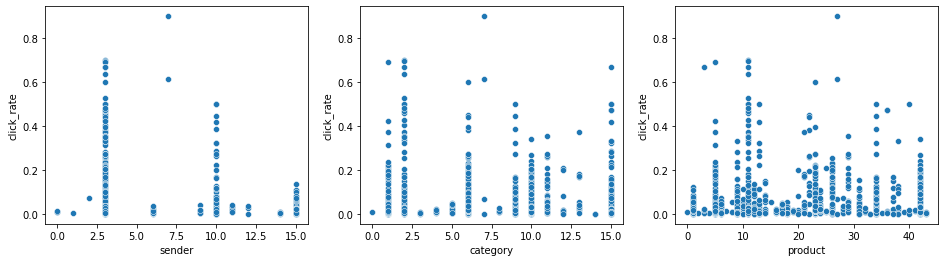

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
sns.scatterplot(data=train, y='click_rate',x='sender', ax=ax[0])
sns.scatterplot(data=train, y='click_rate',x='category', ax=ax[1])
sns.scatterplot(data=train, y='click_rate',x='product', ax=ax[2])

In [58]:
train[['sender', 'product','category','click_rate']].corr()

,sender,product,category,click_rate
sender,1.000000,0.070689,0.188444,-0.031398
product,0.070689,1.000000,0.007144,0.121602
category,0.188444,0.007144,1.000000,-0.167756
click_rate,-0.031398,0.121602,-0.167756,1.000000


In [59]:
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

<AxesSubplot:xlabel='click_rate', ylabel='target_audience'>

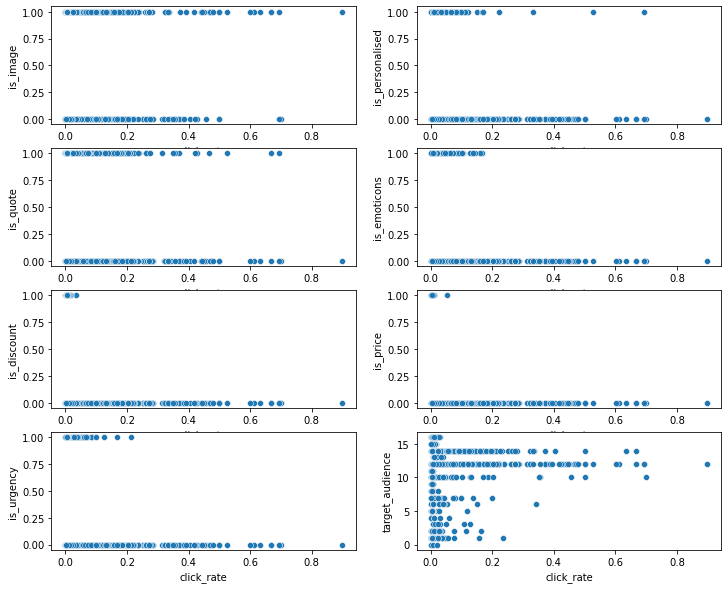

In [60]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,10))
sns.scatterplot(data=train, x='click_rate',y='is_image', ax=ax[0][0])
sns.scatterplot(data=train, x='click_rate',y='is_personalised', ax=ax[0][1])
sns.scatterplot(data=train, x='click_rate',y='is_quote', ax=ax[1][0])
sns.scatterplot(data=train, x='click_rate',y='is_emoticons', ax=ax[1][1])
sns.scatterplot(data=train, x='click_rate',y='is_discount', ax=ax[2][0])
sns.scatterplot(data=train, x='click_rate',y='is_price', ax=ax[2][1])
sns.scatterplot(data=train, x='click_rate',y='is_urgency', ax=ax[3][0])
sns.scatterplot(data=train, x='click_rate',y='target_audience', ax=ax[3][1])

In [61]:
#drop is_price
train[['is_image','is_personalised','is_quote','is_emoticons','is_discount','is_price',
       'is_urgency','target_audience','click_rate']].corr()

,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
is_image,1.000000,0.026337,-0.007930,0.023241,0.013653,0.025479,-0.002080,0.004564,-0.023423
is_personalised,0.026337,1.000000,-0.049778,-0.085137,-0.049853,-0.020409,-0.087175,-0.023227,0.032922
is_quote,-0.007930,-0.049778,1.000000,-0.034348,-0.015454,-0.037303,-0.035719,0.017842,-0.113460
is_emoticons,0.023241,-0.085137,-0.034348,1.000000,0.090934,-0.033424,0.124135,0.074181,-0.118874
is_discount,0.013653,-0.049853,-0.015454,0.090934,1.000000,0.048653,0.185347,-0.030896,-0.086105
is_price,0.025479,-0.020409,-0.037303,-0.033424,0.048653,1.000000,0.031248,0.016839,-0.031621
is_urgency,-0.002080,-0.087175,-0.035719,0.124135,0.185347,0.031248,1.000000,0.058311,-0.114284
target_audience,0.004564,-0.023227,0.017842,0.074181,-0.030896,0.016839,0.058311,1.000000,0.038713
click_rate,-0.023423,0.032922,-0.113460,-0.118874,-0.086105,-0.031621,-0.114284,0.038713,1.000000


In [62]:
drop_cols = ['is_timer']
#is_discount, product
train.drop(drop_cols,axis=1,inplace=True)
test.drop(drop_cols,axis=1,inplace=True)

In [63]:
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_emoticons', 'is_discount',
       'is_price', 'is_urgency', 'target_audience', 'click_rate'],
      dtype='object')

In [64]:
#multicollinearity
X = train[[ 'sender', 'subject_len', 'body_len', 'day_of_week',
       'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience']]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data.head(25)

,feature,VIF
0,sender,3.228411
1,subject_len,11.334123
2,body_len,8.001910
3,day_of_week,7.125017
4,is_weekend,2.616522
5,category,5.231579
6,product,3.074573
7,no_of_CTA,2.795878
8,mean_CTA_len,7.380898
9,is_image,2.569625


In [65]:
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_emoticons', 'is_discount',
       'is_price', 'is_urgency', 'target_audience', 'click_rate'],
      dtype='object')

In [66]:
#sender, product, category, is_weekend, day_of_week, times_of_day,is_personalised,is_urgency,target_audience 
#are categorical,is_discount
#numerical are subject and body len, no_of_CTA, mean_CTA_len, is_image, is_quote,is_emoticons,

In [67]:
# train['audience_time'] = train['times_of_day']*train['target_audience']
# test['audience_time'] = test['times_of_day']*test['target_audience']

# train['mail_length'] = train['body_len']+train['subject_len']
# test['mail_length'] = test['body_len'] + test['subject_len']

# drop_cols = ['times_of_day','body_len','subject_len','target_audience']
# train.drop(drop_cols,axis=1,inplace=True)
# test.drop(drop_cols,axis=1,inplace=True)

# Distribution of features

<AxesSubplot:xlabel='body_len', ylabel='Count'>

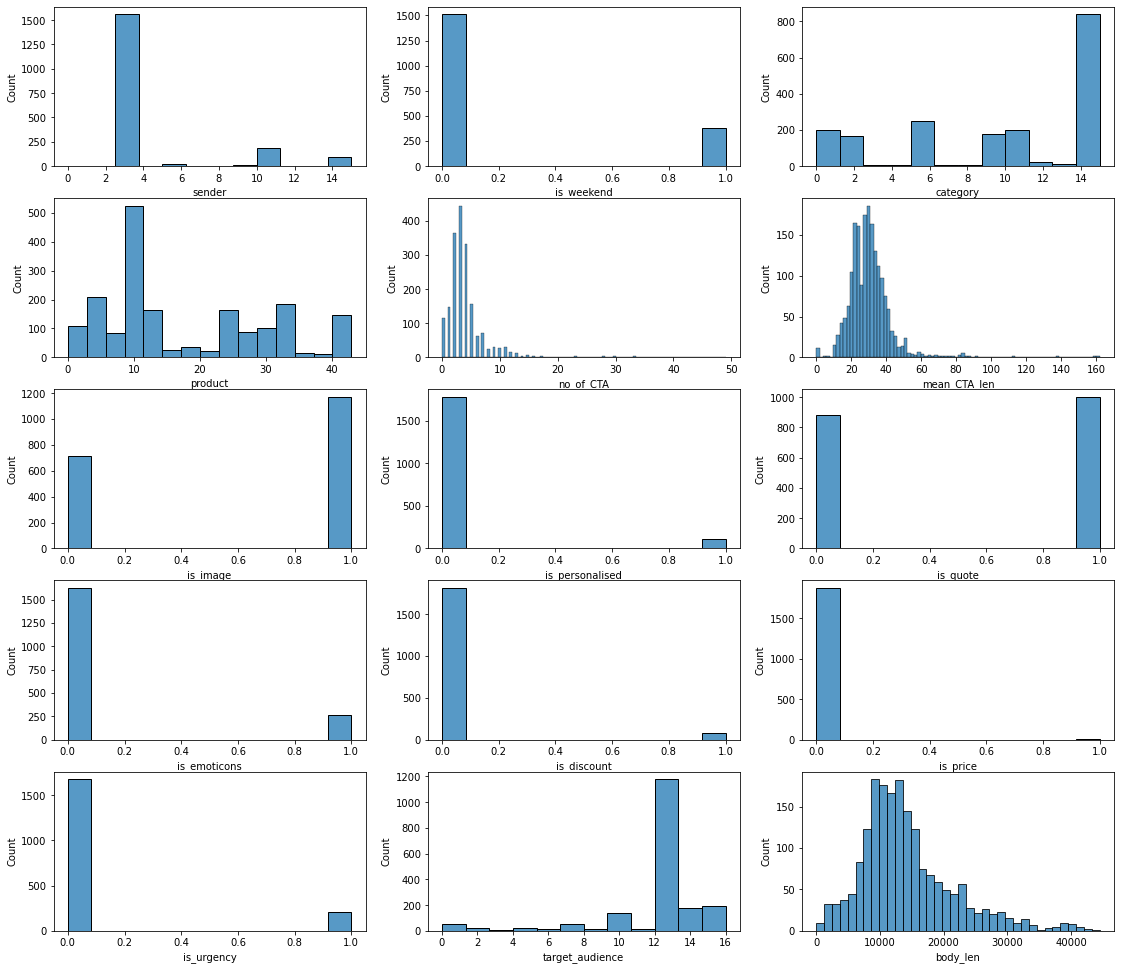

In [68]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(19,17))
sns.histplot(data=train, x='sender', ax=ax[0][0])
sns.histplot(data=train, x='is_weekend', ax=ax[0][1])
sns.histplot(data=train, x='category', ax=ax[0][2])
sns.histplot(data=train, x='product', ax=ax[1][0])
sns.histplot(data=train, x='no_of_CTA', ax=ax[1][1])
sns.histplot(data=train, x='mean_CTA_len', ax=ax[1][2])
sns.histplot(data=train, x='is_image', ax=ax[2][0])
sns.histplot(data=train, x='is_personalised', ax=ax[2][1])
sns.histplot(data=train, x='is_quote', ax=ax[2][2])
sns.histplot(data=train, x='is_emoticons', ax=ax[3][0])
sns.histplot(data=train, x='is_discount', ax=ax[3][1])
sns.histplot(data=train, x='is_price', ax=ax[3][2])
sns.histplot(data=train, x='is_urgency', ax=ax[4][0])
sns.histplot(data=train, x='target_audience', ax=ax[4][1])
sns.histplot(data=train, x='body_len', ax=ax[4][2])

<AxesSubplot:>

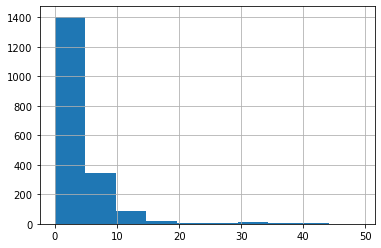

In [27]:
train['no_of_CTA'].hist()

In [28]:
bins = [-1,20,35,200]
labels = ['Low','Medium','High']
train['mean_CTA_len'] = pd.cut(train['mean_CTA_len'],bins=bins,labels=labels)
test['mean_CTA_len'] = pd.cut(test['mean_CTA_len'],bins=bins,labels=labels)
train['mean_CTA_len'].value_counts()

Medium    1183
High       452
Low        253
Name: mean_CTA_len, dtype: int64

In [29]:
bins = [-1,5,9,50]
labels = ['Low','Medium','High']
train['no_of_CTA'] = pd.cut(train['no_of_CTA'],bins=bins,labels=labels)
test['no_of_CTA'] = pd.cut(test['no_of_CTA'],bins=bins,labels=labels)
train['no_of_CTA'].value_counts()

Low       1560
Medium     187
High       141
Name: no_of_CTA, dtype: int64

In [30]:
bins = [0,60,108,500]
labels = ['Low','Medium','High']
train['subject_len'] = pd.cut(train['subject_len'],bins=bins,labels=labels)
train['subject_len'].value_counts()

Medium    1326
Low        291
High       271
Name: subject_len, dtype: int64

In [31]:
bins = [-1,9500,18000,50000]
labels = ['Low','Medium','High']
train['body_len'] = pd.cut(train['body_len'],bins=bins,labels=labels)
train['body_len'].value_counts()

Medium    987
Low       467
High      434
Name: body_len, dtype: int64

In [32]:
bins = [0,25,60,300]
labels = ['Low','Medium','High']
train['mean_paragraph_len'] = pd.cut(train['mean_paragraph_len'],bins=bins,labels=labels)
train['mean_paragraph_len'].value_counts()

Medium    957
Low       771
High      160
Name: mean_paragraph_len, dtype: int64

In [33]:
test['mean_paragraph_len'] = pd.cut(test['mean_paragraph_len'],bins=bins,labels=labels)
test['body_len'] = pd.cut(test['body_len'],bins=bins,labels=labels)
test['subject_len'] = pd.cut(test['subject_len'],bins=bins,labels=labels)

# train test split

In [74]:
X=train.drop(['click_rate','campaign_id','times_of_day'],axis=1)
y=train[['click_rate']]

In [75]:
X.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'times_of_day_Evening', 'times_of_day_Morning',
       'times_of_day_Noon'],
      dtype='object')

In [76]:
X.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,times_of_day_Evening,times_of_day_Morning,times_of_day_Noon
0,3,76,10439,39,5,1,6,26,3,29,...,0,0,0,0,0,0,14,0,0,1
1,3,54,2570,256,5,1,2,11,0,22,...,0,0,0,0,0,0,10,0,1,0
2,3,59,12801,16,5,1,2,11,3,23,...,0,1,0,0,0,0,16,0,0,1
3,3,74,11037,30,4,0,15,9,4,24,...,0,0,0,0,0,0,10,1,0,0
4,3,80,10011,27,5,1,6,26,3,31,...,0,1,0,0,0,0,14,0,0,1


In [77]:
X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)

In [36]:
# cols = [ 'sender', 'subject_len', 'body_len', 'mean_paragraph_len',
#        'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product',
#        'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
#        'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
#        'target_audience']
# X[cols] = X[cols].astype('category')

# cat_indices = []
# for col in cols:
#     cat_indices.append(X.columns.get_loc(col))

In [78]:
# std = MinMaxScaler()
# cols = ['no_of_CTA','mean_CTA_len',]
# X_train[cols] = std.fit_transform(X_train[cols])

# Transformation

In [ ]:
from scipy import stats
y_train = y_train['click_rate'].to_numpy()

In [40]:
cat_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [ ]:
#log tranformation of y variable
y_train_transformed = stats.boxcox(y_train)

In [ ]:
y_train_transformed['click_rate'].hist()

# Linear regression

In [79]:
lr = linear_model.LinearRegression(fit_intercept=True,positive=False)
lr.fit(X_train,y_train)

# regression coefficients
print('Coefficients: ', lr.coef_)
  
# variance score: 1 means perfect prediction
print('Test Variance score: {}'.format(lr.score(X_test, y_test)))
print('Train Variance score: {}'.format(lr.score(X_train, y_train)))

Coefficients:  [[-4.82858971e-04 -1.79535526e-04 -1.24037834e-06  3.54540988e-04
  -5.67126527e-04  1.20673617e-02 -2.12626756e-03  7.53484298e-04
  -1.43068592e-03  6.93200622e-05 -3.36072116e-03 -3.61104806e-03
  -1.46801090e-02 -2.10889143e-02 -9.91481730e-03 -1.70625528e-02
  -1.29234326e-02  1.41441746e-03 -1.91946183e-02  1.90650423e-02
   1.29575943e-04]]
Test Variance score: 0.12120210201510917
Train Variance score: 0.15846170275423954


In [80]:
preds = lr.predict(X_test)
# preds = preds**2
r2_score(y_test,preds)

0.12120210201510917

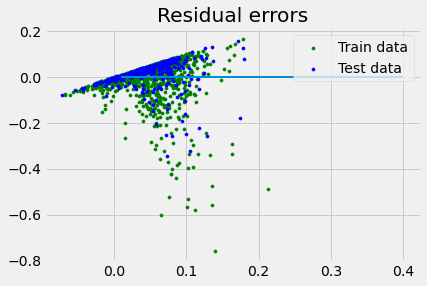

In [81]:
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0.01, xmax = 0.4, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()


In [82]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.12120210201510917

# Decision Tree Classifier

In [83]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
r2_score(y_test,y_pred)

-0.7399587554522422

# Random Forest Regressor

In [84]:
X_train.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,times_of_day_Evening,times_of_day_Morning,times_of_day_Noon
1474,10,70,25482,17,1,0,15,12,5,26,...,0,1,0,0,0,0,12,1,0,0
1359,3,55,15812,17,0,0,15,9,2,24,...,0,0,0,0,0,0,12,1,0,0
932,3,93,6956,48,3,0,15,28,2,38,...,0,1,0,0,0,0,12,1,0,0
618,3,66,21556,26,2,0,4,16,4,30,...,0,0,0,0,0,0,12,1,0,0
588,3,86,14196,32,4,0,15,31,4,38,...,0,0,1,0,0,0,12,0,0,1


In [85]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
#y_pred = y_pred**2
print(r2_score(y_test,y_pred))
y_pred_train = rf.predict(X_train)
#y_pred_train = y_pred_train **2
print(r2_score(y_train,y_pred_train))

/var/folders/9x/j42r0vlj4lv95k0r2zfxlpfr0000gn/T/ipykernel_714/1387117488.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.4875830204304761
0.9287819517393455


In [86]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 211, 372, 533, 694, 855, 1016, 1177, 1338, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 13, 24, 35, 45, 56, 67, 77, 88, 99, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [87]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/satyasriallaka/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/satyasriallaka/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/satyasriallaka/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/satyasriallaka/.local/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/satyasriallaka/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/satyasriallaka/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/satyasriallaka/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/satyasriallaka/.local/lib/python3.9/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 13, 24, 35, 45, 56, 67,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 211, 372, 533, 694,
                                                         855, 1016, 1177, 1338,
                                                         1500]},
                   random_state=42, verbose=2)

[CV] END bootstrap=False, max_depth=67, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=694; total time=   1.6s
[CV] END bootstrap=True, max_depth=45, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=45, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=77, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=694; total time=   3.9s
[CV] END bootstrap=True, max_depth=77, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=694; total time=   3.9s
[CV] END bootstrap=False, max_depth=99, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=372; total time=   0.8s
[CV] END bootstrap=False, max_depth=67, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=372; total time=   3.1s
[CV] END bootstrap=True, max_depth=99, max_

In [88]:
y_pred = rf_random.predict(X_test)
#y_pred = y_pred**2
print(r2_score(y_test,y_pred))
y_pred_train = rf_random.predict(X_train)
#y_pred_train = y_pred_train **2
print(r2_score(y_train,y_pred_train))

0.5049981936620945
0.8529967448060541


In [ ]:
# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
#                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X, y)

In [ ]:
y_transformed = np.sqrt(y)
rf = RandomForestRegressor(random_state=42)
rf.fit(X,y_transformed)

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [50, 200, 500],
        'objective': ['reg:squarederror']
    }

xgb_model = XGBRegressor()

gsearch = GridSearchCV(estimator = xgb_model,
                       param_grid = param_tuning,                        
                       #scoring = 'neg_mean_absolute_error', #MAE
                       #scoring = 'neg_mean_squared_error',  #MSE
                       cv = 5,
                       n_jobs = -1,
                       verbose = 1)
gsearch.fit(X_train,y_train)
gsearch.best_params_

# Submission

In [ ]:
submission = pd.read_csv(r'sample_submission_LJ2N3ZQ.csv')
test.head()

In [ ]:
test2 = test[['campaign_id']]
test1 = test.drop('campaign_id',axis=1)
y_pred_test = rf.predict(test1)
y_pred_test = y_pred_test**2
test2['click_rate'] = y_pred_test

In [ ]:
test2.to_csv(r"rf_no_tune_sqrt_sunday.csv",index=False)